<a href="https://colab.research.google.com/github/iamatul1214/Pytorch/blob/main/Linear_regression_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
## To check the GPU allocated
!nvidia-smi

Mon Mar  7 18:08:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
## We have got Tesla K80 GPU

## Let's create a sample dataset with 4 features and two labels.
### Features- Region, Temperature, Rainfall, humidity
### Label- Production of wheat, production of rice.
## Here we have two labels in same data so we will have two different equations for each label. 
### y1 (Prod. of wheat)=w11*temp + w12*rainfall + w13*humidity + bias1
### y2 (Prod. of Rice)=w21*temp + w22*rainfall + w23*humidity + bias2


In [25]:
import numpy as np
import torch
import matplotlib.pyplot as plt


In [19]:
## Let's create input data
input=np.array([[32,55,77],
                [82,15,37],
                [72,74,90],
                [34,56,90],
                [67,32,45],
                [91,90,45],], dtype='float32')        ## We can take float64 as well, but in order to save memory we are taking float32
input

array([[32., 55., 77.],
       [82., 15., 37.],
       [72., 74., 90.],
       [34., 56., 90.],
       [67., 32., 45.],
       [91., 90., 45.]], dtype=float32)

In [20]:
## Let's create the target data of label
target=np.array([[32,44],
                 [78,61],
                 [90,71],
                 [74,32],
                 [36,32],
                 [22,69]], dtype='float32')
target

array([[32., 44.],
       [78., 61.],
       [90., 71.],
       [74., 32.],
       [36., 32.],
       [22., 69.]], dtype=float32)

In [21]:
## Now we need to convert input and target to tensors because we are going to work with pytorch. Pytorch and Tensorflow required tensors only because they also work on GPU

input=torch.from_numpy(input)
target=torch.from_numpy(target)

print(input)
print(target)

tensor([[32., 55., 77.],
        [82., 15., 37.],
        [72., 74., 90.],
        [34., 56., 90.],
        [67., 32., 45.],
        [91., 90., 45.]])
tensor([[32., 44.],
        [78., 61.],
        [90., 71.],
        [74., 32.],
        [36., 32.],
        [22., 69.]])


In [22]:
## assigning random weights and biases initially
weights=torch.randn(2,3, requires_grad=True)     ## We need 3 weights for wheat and rice each
bias=torch.randn(2, requires_grad=True)          ## We only need two biases

print(weights)
print(bias)

tensor([[ 0.3738, -0.8324, -0.5374],
        [ 0.4515,  0.3903,  0.5958]], requires_grad=True)
tensor([-1.5068, -0.1233], requires_grad=True)


In [23]:
## Now let's create the matrix multiplication of our model
def model(input):
  return input @ weights.t() + bias       ## input @ weights.t()--> dot product of the input and transpose of weight matrix

In [24]:
prediction=model(input)
print(prediction)

tensor([[-76.7061,  81.6638],
        [ -3.2249,  64.7983],
        [-84.5552, 114.8846],
        [-83.7773,  90.7019],
        [-27.2813,  69.4263],
        [-66.5866, 102.8990]], grad_fn=<AddBackward0>)


In [30]:
from numpy.lib.function_base import diff
## Let's calculate Mean squared error
def MSE(t1,t2):
  difference=t1-t2
  return torch.sum(difference * difference)/ difference.numel()



In [31]:
loss= MSE(prediction, target)
print(loss)

tensor(7915.3711, grad_fn=<DivBackward0>)


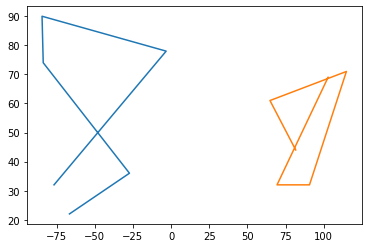

In [33]:
plt.plot(prediction.detach().numpy(), target.detach().numpy())
plt.show()

### We observed the loss value and also the grapgh and found that there are lot of differnces among both of the prediction and actual.